In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
# Step 2: Load the Dataset
data = pd.read_excel('rwc _dataset.xlsx')

In [3]:
# Remove the columns that are not relevant for the anomaly detection model
data.drop(columns=['Seam number', 'start time (power source time)', 'Jobs'], inplace=True)

In [4]:
# Data Preprocessing
# Handle missing values if any
data.dropna(inplace=True)

In [5]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Energy(E) [KJ]'])
y = data['Energy(E) [KJ]']

In [6]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [8]:
# Build the Isolation Forest model
# Contamination represents the expected ratio of anomalies
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [9]:
# Predict anomalies on the test set
predictions = model.predict(X_test)

In [10]:
# Convert X_test back to DataFrame with the appropriate column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [11]:
# Add the predictions back to the original DataFrame
data['Anomaly'] = 1
# Set all data as normal (1) initially
data.loc[X_test_df.index, 'Anomaly'] = predictions
# Assign predicted anomalies for test data

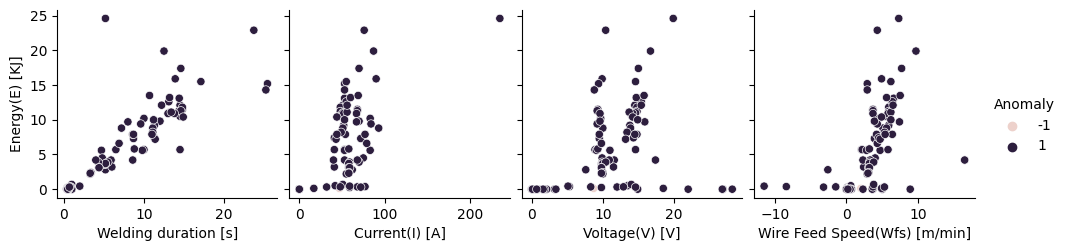

In [12]:
# Data Visualization
# Scatter plot for features and target variable (Energy)
sns.pairplot(data=data, x_vars=['Welding duration [s]', 'Current(I) [A]', 'Voltage(V) [V]', 'Wire Feed Speed(Wfs) [m/min]'], y_vars=['Energy(E) [KJ]'], hue='Anomaly', diag_kind=None)
plt.show()

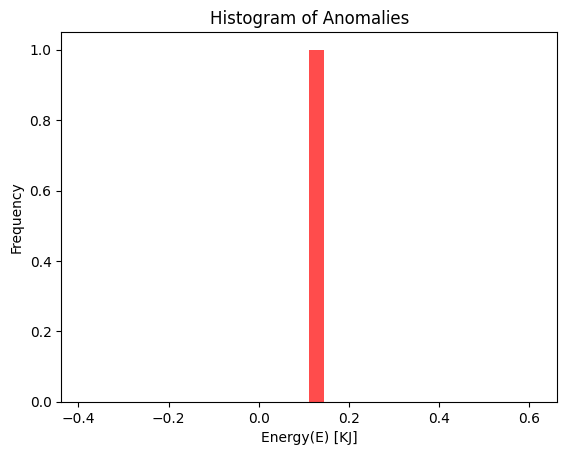

In [13]:
# Histogram of anomalies
plt.figure()
plt.hist(data['Energy(E) [KJ]'][data['Anomaly'] == -1], bins=30, color='red', alpha=0.7)
plt.xlabel('Energy(E) [KJ]')
plt.ylabel('Frequency')
plt.title('Histogram of Anomalies')
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE for the anomaly detection model
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 8.878560225859289


In [15]:
# anomalies is exported to a new CSV file
anomalies = data[data['Anomaly'] == -1]
anomalies.to_csv('anomalies.csv', index=False)

In [16]:
print(anomalies)

   Welding duration [s]  Current(I) [A]  Voltage(V) [V]  \
4                   0.6              47             8.7   

   Wire Feed Speed(Wfs) [m/min]  Power(P) [W]  Energy(E) [KJ]  Anomaly  
4                           2.0         404.1           0.112       -1  


Real-time Data collection and preprocessing:

In [17]:
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler

# Define and initialize the scaler
scaler = StandardScaler()

# Simulated data collection from the robotic welding cell
def collect_data():
    # Replacing actual data with collection code from the robotic welding cell
    # Let's take random data
    data = {
       'Welding duration [s]': [10, 12, 11, 15],
        'Current(I) [A]': [100, 110, 105, 95],
        'Voltage(V) [V]': [220, 230, 215, 210],
        'Wire Feed Speed(Wfs) [m/min]': [50, 55, 52, 58],
        'Power (P) [W]': [2000, 2100, 2050, 1900]
    }
    return pd.DataFrame(data)

# Data Preprocessing (using the previously defined scaler)
def preprocess_data(data):
    return scaler.transform(data)

# Fit the scaler to some initial data (you can use a representative sample)
initial_data = collect_data()
scaler.fit(initial_data)

# Define the duration for which the loop should run (in seconds)
# Run for 60 seconds
loop_duration = 60

start_time = time.time()
while time.time() - start_time < loop_duration:
    # Collect data from the robotic welding cell
    new_data = collect_data()

    # Preprocess the data
    preprocessed_data = preprocess_data(new_data)

    # Predict anomalies using the model
    predictions = model.predict(preprocessed_data)

    # Implement automated response for critical anomalies
    if any(predictions == -1):
        print("Critical anomaly detected!")

    # Implement the rest of the real-time monitoring and alerting logic here
    # simply print the predictions
    print(predictions)

    # Wait for some time before collecting the next batch of data
    # Simulate real-time updates every 5 seconds
    time.sleep(5)


Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]
Critical anomaly detected!
[ 1  1  1 -1]


email alerting system for warning

In [18]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email_alert(message):
    # Email configuration
    sender_email = 'bahatic871@gmail.com'
    sender_password = '1231231230'
    recipient_email = 'bahaticharles203@example.com'

    # Create message
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = 'Anomaly Alert'

    # Attach message body
    msg.attach(MIMEText(message, 'plain'))

    # Connect to SMTP server and send email
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.sendmail(sender_email, recipient_email, msg.as_string())



In [19]:
pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


Real-time Monitoring and Visualization:

In [20]:
import dash
from dash import dcc, html
from dash.dependencies import Output
import plotly.express as px
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler


# Simulated data collection from the robotic welding cell
def collect_data():
    # Replace this with actual data collection code from the robotic welding cell
    # For this example, let's take random data
    data = {
        'Welding Duration': [10, 12, 11, 15],
        'Energy': [200, 220, 210, 240]  # Simulated energy consumption data
    }
    return pd.DataFrame(data)

# Data Preprocessing (fit the scaler and then transform the data)
def preprocess_data(data):
    return scaler.transform(data)

# Define and initialize the scaler
scaler = StandardScaler()

# Fit the scaler to some initial data (you can use a representative sample)
initial_data = collect_data()
scaler.fit(initial_data)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='real-time-plot'),
    dcc.Interval(
        id='interval-component',
        interval=5*1000,  # Update every 5 seconds
        n_intervals=0
    )
])

@app.callback(Output('real-time-plot', 'figure'),
              [dash.dependencies.Input('interval-component', 'n_intervals')])
def update_real_time_plot(n):
    # Collect data from the robotic welding cell
    new_data = collect_data()

    # Preprocess the data
    preprocessed_data = preprocess_data(new_data)

    # Predict anomalies using the model (replace this with your model)
    predictions = model.predict(preprocessed_data)

    # Visualize the real-time data and anomalies
    fig = px.scatter(new_data, x='Welding Duration', y='Energy', color=predictions,
                     labels={'Energy': 'Energy Consumption'},
                     title='Real-time Energy Consumption and Anomaly Detection')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>